In [1]:
standard = {
    "没有(根本不)": 1,
    "不会": 1,
    "很少(有一点)": 2,
    "偶尔": 2,
    "有时(有些)": 3,
    "还可以": 3,
    "经常(相当)": 4,
    "总是(非常)": 5
}

In [15]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]
    score: int

graph_builder = StateGraph(State)

In [2]:
from langchain.tools import Tool
from langchain_community.llms.moonshot import Moonshot
import numpy as np
import matplotlib.pyplot as plt
import time
from cmllm import TypeClassifier, Valuator, SoulutionProposer
from cmllm import Score
import os


score = Score()
score_tools = [
    Tool.from_function(
        func=score.calculate_final,
        name="Calculate conversion scores",
        description="useful for when you need to calculate conversion scores from raw score"
        # coroutine= ... <- you can specify an async method if desired as well
    ),
    Tool.from_function(
        func=score.update,
        name="Update score after questions",
        description="useful for when you need to record score of answer"
        # coroutine= ... <- you can specify an async method if desired as well
    )
    ]
os.environ["MOONSHOT_API_KEY"] = "sk-jp2VoAvlcR3QS8azmXmFIRqxLA4nEVF4o48j8EkJilkm3DfV"
llm = Moonshot(temperature=0.1)
que = '您胃脘部背部或腰膝部怕冷吗？'
va = Valuator(llm, standard, score_tools)
ad = SoulutionProposer(llm)
# va.invoke({'question':que, 'answer':'有时会感到怕冷，特别是在吃完冰淇淋后，但冬天经常容易'})

In [17]:
ans_list = []
with open('ans.txt', 'r', encoding='utf-8') as file:
    for line in file:
        ans = line.strip()  # 去掉行末尾的空白字符
        if ans:
            ans_list.append(ans)

In [18]:
ans_iterator = iter(ans_list)

In [19]:
# 定义文件夹路径
folder_path = './questions'
result = {}
final = {}
# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    # 构建每个文件的完整路径
    file_path = os.path.join(folder_path, filename)
    catagory = os.path.splitext(filename)[0]
    # 检查是否为文件
    if os.path.isfile(file_path):
        print(f"Processing file: {filename}")
        
        # 打开并逐行读取文件中的问题
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                question = line.strip()  # 去掉行末尾的空白字符
                if question:
                    print(f"Question: {question}", flush=True)
                    ans = next(ans_iterator)
                    # ans = input()
                    print(f"Answer:{ans}", flush=True)
                    va.invoke({'question':que, 'answer': ans})
    result[catagory] = score.score
    final[catagory] = score.calculate_final()


Processing file: 平和体质.txt
Question: 您精力充沛吗？
Answer:还可以，白天时候精力很充沛
3
Question: 您容易疲乏吗？*
Answer:有时候会感到累
3
Question: 您说话声音低弱无力吗？*
Answer:不会
1
Question: 您感到闷闷不乐、情绪低沉吗？*
Answer:通常不会
2
Question: 您比一般人耐受不了寒冷(冬天的寒冷、夏天的冷空调、电扇等)吗？*
Answer:不会，我很能耐寒
1
Question: 您能适应外界自然和社会环境的变化吗？
Answer:完全可以
5
Question: 您容易失眠吗？*
Answer:经常会晚上睡不着
3
Question: 您容易忘事(健忘)吗？*
Answer:一般不会
2
Processing file: 阴虚体质.txt
Question: 您感到手脚心发热吗？
Answer:没有感到
1
Question: 您感觉身体、脸上发热吗？
Answer:一般不会
2
Question: 您皮肤或口唇干吗？
Answer:一般不会
2
Question: 您口唇的颜色比一般人红吗？
Answer:没有，属于正常颜色
1
Question: 您容易便秘或大便干燥吗？
Answer:不会
1
Question: 您面部两颧潮红或偏红？
Answer:没有过
1
Question: 您感到眼睛干涩吗？
Answer:有时看电脑多了会出现
3
Question: 您感到口干咽燥、总想喝水吗？
Answer:偶尔会这样
3
Processing file: 痰湿体质.txt
Question: 您感到胸闷或腹部胀满吗？
Answer:没有
1
Question: 您感到身体沉重不轻松或不爽快吗？
Answer:一般不会，除非剧烈运动后
3
Question: 您腹部肥满松软吗？
Answer:一般
3
Question: 您有额部油脂分泌多的现象吗？
Answer:略微有一点
2
Question: 您上眼睑比别人肿（上眼睑有轻微隆起的现象）吗？
Answer:有时会有
3
Question: 您嘴里有黏黏的感觉吗？
Answer:有时会有
3
Question: 您平时痰多，特别是咽喉部总感到有痰堵着吗？
Answer:基本不会有
2
Questi

In [20]:
print(result)
print(final)

{'平和体质': 20, '阴虚体质': 14, '痰湿体质': 19, '气虚体质': 15, '特禀体质': 16, '阳虚体质': 16, '湿热体质': 19, '淤血体质': 8, '气郁体质': 10}
{'平和体质': 37.5, '阴虚体质': 18.75, '痰湿体质': 34.375, '气虚体质': 21.875, '特禀体质': 32.142857142857146, '阳虚体质': 32.142857142857146, '湿热体质': 42.857142857142854, '淤血体质': 3.571428571428571, '气郁体质': 10.714285714285714}


In [21]:
def final_show(final):
    plt.rcParams['font.sans-serif'] = ["SimHei"]  # 用黑体显示中文
    plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
    # 获取标签和数值
    labels = list(final.keys())
    values = list(final.values())
    num_vars = len(labels)

    # 计算角度
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # 闭合图形
    values += values[:1]
    angles += angles[:1]

    # 初始化雷达图
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # 绘制雷达图
    ax.fill(angles, values, color='skyblue', alpha=0.4)
    ax.plot(angles, values, color='blue', linewidth=2)

    # 添加标签
    ax.set_ylim(0, 70) 
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=14)
    ax.tick_params(pad=20)

    # 显示图形
    plt.show()

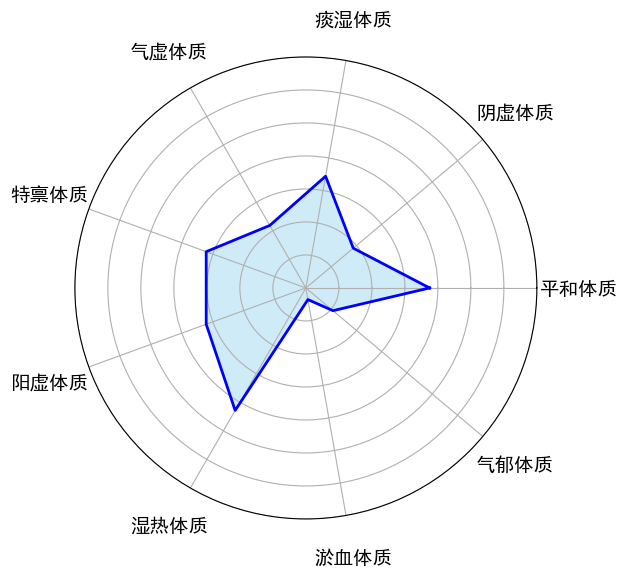

In [22]:
final_show(final)

In [3]:
result = {'平和体质': 23, '阴虚体质': 14, '痰湿体质': 20, '气虚体质': 17, '特禀体质': 16, '阳虚体质': 16, '湿热体质': 19, '淤血体质': 8, '气郁体质': 10}
final = {'平和体质': 46.875, '阴虚体质': 18.75, '痰湿体质': 37.5, '气虚体质': 28.125, '特禀体质': 32.142857142857146, '阳虚体质': 32.142857142857146, '湿热体质': 42.857142857142854, '淤血体质': 3.571428571428571, '气郁体质': 10.714285714285714}

In [9]:
from cmllm import type_judge
type_result = type_judge(final)
# type_result['淤血体质'] = 2

In [10]:
print(type_result)

{'平和体质': 0, '阴虚体质': 0, '痰湿体质': 1, '气虚体质': 0, '特禀体质': 1, '阳虚体质': 1, '湿热体质': 2, '淤血体质': 0, '气郁体质': 0}


In [11]:
final_type = [key for key, value in type_result.items() if value == 2]
print(final_type)

['湿热体质']


In [12]:
tend_type = [key for key, value in type_result.items() if value == 1]
print(tend_type)

['痰湿体质', '特禀体质', '阳虚体质']


In [13]:
text_result = ad.invoke({"result": final_type, "pretend_result": tend_type})
print(text_result) 

根据您提供的体质分类结果，您的主要体质类型为湿热体质，同时具有痰湿体质、特禀体质和阳虚体质的倾向。以下是针对这些体质类型的综合建议：

1. 湿热体质：
   - 饮食：宜清淡，避免油腻、辛辣、煎炸食物，多吃清热利湿的食物，如绿豆、冬瓜、苦瓜等。
   - 生活习惯：保持规律作息，避免熬夜，适当增加运动，如散步、太极等，以助于调节体内湿热。
   - 情绪管理：保持心情舒畅，避免过度焦虑和压力，可进行冥想、瑜伽等放松身心的活动。

2. 痰湿体质：
   - 饮食：减少甜食和油腻食物的摄入，多吃健脾利湿的食物，如薏米、赤小豆、山药等。
   - 运动：增加有氧运动，如快走、游泳等，有助于促进新陈代谢，减少痰湿。
   - 环境：保持居住环境干燥通风，避免潮湿环境加重痰湿。

3. 特禀体质：
   - 饮食：避免过敏源食物，如海鲜、花生等，根据个人过敏情况调整饮食。
   - 生活习惯：保持规律作息，避免接触过敏原，如花粉、尘螨等。
   - 情绪管理：保持心情平和，避免情绪波动过大，可进行冥想、呼吸练习等放松身心。

4. 阳虚体质：
   - 饮食：增加温补食物，如羊肉、鸡肉、红枣、桂圆等，避免寒凉食物。
   - 运动：适量进行温和运动，如散步、太极等，避免剧烈运动导致阳气耗损。
   - 保暖：注意保暖，避免受凉，尤其是腹部和足部。

综合以上建议，希望对您有所帮助。请根据自身情况调整生活习惯和饮食，以达到更好的健康状态。如有需要，可咨询专业中医师进行个性化指导。
